In [1]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_excel('tutorial1.xlsx')
print(data)
X1 = data.x1
X2 = data.x2
X3 = data.x3
Y = data.y

X = np.column_stack((X1, X2, X3))

# y = time to failure of a machine
# x1 = operating voltage
# x2 = motor speed(rev/min)
# x3 = operating temp.

      y   x1    x2   x3
0  2145  110   750  140
1  2155  110   850  180
2  2220  110  1000  140
3  2225  110  1100  180
4  2260  120   750  140
5  2266  120   850  180
6  2334  120  1000  140
7  2340  130  1000  180
8  2212  115   840  150
9  2180  115   880  150


# 1)

In [3]:
linear_model = LinearRegression().fit(X, Y)
b0 = linear_model.intercept_
b1, b2, b3 = linear_model.coef_

In [4]:
Y_predicted_linear = b0 + b1*X1 + b2*X2 + b3*X3  
print('The coefficients are: ', b0, b1, b2, b3)

The coefficients are:  1108.7244911480202 8.639331823916764 0.2607707242318972 -0.7114061770856739


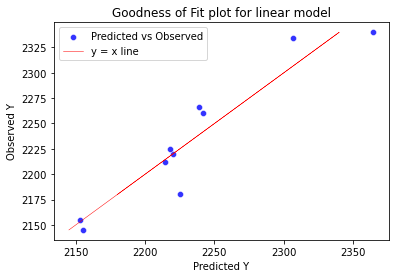

In [5]:
#Goodness of Fit plot for linear model
 
sns.scatterplot(x = Y_predicted_linear, y = Y, color = 'blue', alpha = 0.8, linewidth = 0.5, label = 'Predicted vs Observed')
plt.plot(Y, Y, color = 'red', alpha = 1, linewidth = 0.5, label = 'y = x line')
plt.xlabel('Predicted Y')
plt.ylabel('Observed Y')
plt.title('Goodness of Fit plot for linear model')
plt.legend()
plt.show()

# 2)

In [6]:
# Concatenate original features with new features
X = np.column_stack((X1, X2, X3, X2 ** 2, X3 ** 2, X2 * X3))

# Fit linear regression model
model = LinearRegression().fit(X, Y)

# Extract coefficients
b0 = model.intercept_
b1, b2, b3, b4, b5, b6 = model.coef_


Y_predicted_non_linear = b0 + b1*X1 + b2*X2 + b3*X3 + b4*X2**2 + b5*X3**2 + b6*X2*X3
print("b0:", b0)
print("b1:", b1)
print("b2:", b2)
print("b3:", b3)
print("b4:", b4)
print("b5:", b5)
print("b6:", b6)

b0: -1841.0525189714403
b1: 11.625332413166115
b2: -6.143230142299332
b3: 68.3338233811871
b4: 0.006130664826308905
b5: -0.12655834346615788
b6: -0.030665779355214775


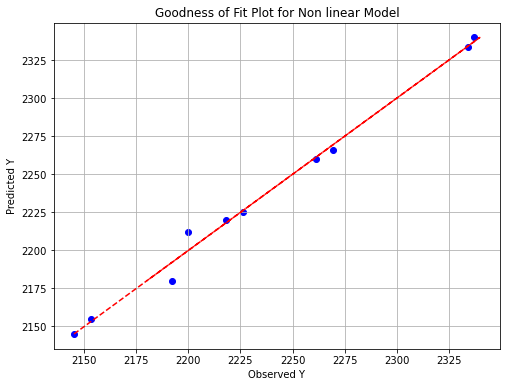

In [7]:
predicted_Y = model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_Y, Y, color='blue')
plt.plot(Y, Y, color='red', linestyle='--')  # Plotting the line y=x for reference
plt.title('Goodness of Fit Plot for Non linear Model')
plt.xlabel('Observed Y')
plt.ylabel('Predicted Y')
plt.grid(True)
plt.show()

# 3)

In [8]:
# Assuming 'data' is your original dataset
print('The shape of data before dimension reduction is: \n', np.shape(data))

# Fit PCA on original data
pca_linear = PCA(n_components=2)
pca_linear.fit(data)

# Transform original data to 2 dimensions
data_2dim = pca_linear.transform(data)

# Assign PCA components to pca1_actual and pca2_actual
pca1_actual = data_2dim[:, 0]
pca2_actual = data_2dim[:, 1]


The shape of data before dimension reduction is: 
 (10, 4)


The shape of data after dimension reduction in PCA is: 
 (10, 2)
The matrix with predicted values is:
[[2155.03217016  110.          750.          140.        ]
 [2152.6529955   110.          850.          180.        ]
 [2220.22485122  110.         1000.          140.        ]
 [2217.84567656  110.         1100.          180.        ]
 [2241.4254884   120.          750.          140.        ]
 [2239.04631374  120.          850.          180.        ]
 [2306.61816946  120.         1000.          140.        ]
 [2364.55524061  130.         1000.          180.        ]
 [2214.58413269  115.          840.          150.        ]
 [2225.01496166  115.          880.          150.        ]]
The shape of data before dimension reduction is:  (10, 4)
The shape of data after dimension reduction is:  (10, 2)


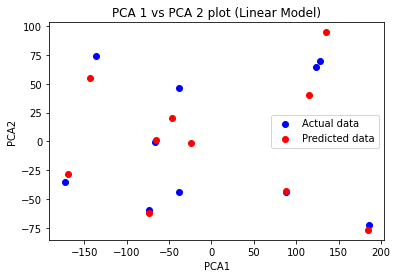

In [9]:
# Check the shape of data after dimension reduction
print('The shape of data after dimension reduction in PCA is: \n', np.shape(data_2dim))

# Now we will use PCA to reduce the dimension of the predicted data
data_predicted_linear = np.column_stack((Y_predicted_linear, data[['x1', 'x2', 'x3']]))
print('The matrix with predicted values is:')
print(data_predicted_linear)
print('The shape of data before dimension reduction is: ', data_predicted_linear.shape)

# Fit PCA to the predicted data after combining it with the predicted values
pca_linear = PCA(n_components=2)
pca_linear.fit(data_predicted_linear) 

# Transform the predicted data to 2 dimensions using the fitted PCA
data_predicted_linear_2dim = pca_linear.transform(data_predicted_linear)

# Check the shape of data after dimension reduction
print('The shape of data after dimension reduction is: ', data_predicted_linear_2dim.shape)

# Assign the first and second principal components to pca1_predicted_linear and pca2_predicted_linear
pca1_predicted_linear = data_predicted_linear_2dim[:, 0]
pca2_predicted_linear = data_predicted_linear_2dim[:, 1]

import matplotlib.pyplot as plt

# Plot PCA 1 vs PCA 2
plt.scatter(pca1_actual, pca2_actual, color='blue', label='Actual data')
plt.scatter(pca1_predicted_linear, pca2_predicted_linear, color='red', label='Predicted data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA 1 vs PCA 2 plot (Linear Model)')
plt.legend()
plt.show()


# 4)


In [12]:
# Assuming 'data' is your original dataset
print('The shape of data before dimension reduction is: \n', np.shape(data))

# Fit PCA on original data
pca_non_linear = PCA(n_components=2)
pca_non_linear.fit(data)

# Transform original data to 2 dimensions
data_2dim = pca_non_linear.transform(data)

# Assign PCA components to pca1_actual and pca2_actual
pca1_actual = data_2dim[:, 0]
pca2_actual = data_2dim[:, 1]


The shape of data before dimension reduction is: 
 (10, 4)


The shape of data after dimension reduction in PCA is: 
 (10, 2)
The matrix with predicted values is:
[[2145.09531368  110.          750.          140.        ]
 [2153.12740149  110.          850.          180.        ]
 [2218.15136219  110.         1000.          140.        ]
 [2226.05889776  110.         1100.          180.        ]
 [2261.34863781  120.          750.          140.        ]
 [2269.38072562  120.          850.          180.        ]
 [2334.40468632  120.         1000.          140.        ]
 [2337.43297512  130.         1000.          180.        ]
 [2199.96707089  115.          840.          150.        ]
 [2192.03292911  115.          880.          150.        ]]
The shape of data before dimension reduction is:  (10, 4)
The shape of data after dimension reduction is:  (10, 2)


C:\Users\Aditya\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


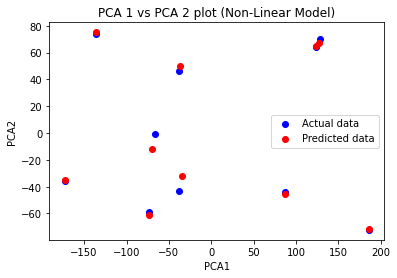

In [13]:
print('The shape of data after dimension reduction in PCA is: \n', np.shape(data_2dim))

data_predicted_non_linear = np.column_stack((Y_predicted_non_linear, data[['x1', 'x2', 'x3']]))
print('The matrix with predicted values is:')
print(data_predicted_non_linear)
print('The shape of data before dimension reduction is: ', data_predicted_non_linear.shape)

pca_non_linear = PCA(n_components=2)
pca_non_linear.fit(data_predicted_non_linear) 

data_predicted_non_linear_2dim = pca_linear.transform(data_predicted_non_linear)

print('The shape of data after dimension reduction is: ', data_predicted_non_linear_2dim.shape)

pca1_predicted_non_linear = data_predicted_non_linear_2dim[:, 0]
pca2_predicted_non_linear = data_predicted_non_linear_2dim[:, 1]

import matplotlib.pyplot as plt

plt.scatter(pca1_actual, pca2_actual, color='blue', label='Actual data')
plt.scatter(pca1_predicted_non_linear, pca2_predicted_non_linear, color='red', label='Predicted data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA 1 vs PCA 2 plot (Non-Linear Model)')
plt.legend()
plt.show()
